In [38]:
#https://www.zybuluo.com/hanbingtao/note/476663
#手写数字识别

#数据下载
# from tensorflow.examples.tutorials.mnist import input_data
# mnist=input_data.read_data_sets('/tmp/',one_hot=True)
#或者：download:http://yann.lecun.com/exdb/mnist/

#文件路径
import os

base_path='/Users/yexianyong/Downloads/machine_learning/mnist'
training_images_path=os.path.join(base_path,'train-images-idx3-ubyte')
training_labels_path=os.path.join(base_path,'train-labels-idx1-ubyte')
test_images_path=os.path.join(base_path,'t10k-images-idx3-ubyte')
test_labels_path=os.path.join(base_path,'t10k-labels-idx1-ubyte')

training_images_path

'/Users/yexianyong/Downloads/machine_learning/mnist/train-images-idx3-ubyte'

In [39]:
#读取文件
#http://blog.csdn.net/simple_the_best/article/details/75267863
import struct
import numpy as np

def load_mnist(images_path,labels_path,kind='train'):
    """Load MNIST data from path"""
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II',lbpath.read(8))
        labels = np.fromfile(lbpath,dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack('>IIII',imgpath.read(16))
        images = np.fromfile(imgpath,dtype=np.uint8).reshape(len(labels), 784)

    return images, labels
images,labels=load_mnist(training_images_path,training_labels_path)
images,labels

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

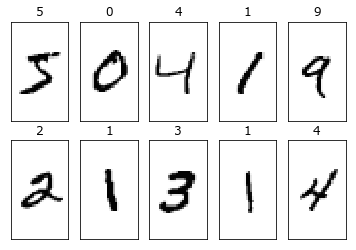

In [40]:
#可视化
import matplotlib.pyplot as plt
fig,ax=plt.subplots(nrows=2,ncols=5,sharex=True,sharey=True)

ax = ax.flatten()
for i in range(10):
    img = images[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title(labels[i])
    
ax[0].set_xticks([])
ax[0].set_yticks([])

plt.show()

In [41]:
#构造训练相关数据
#给images添加bias：1

#inputs
inputs=np.zeros((images.shape[0],images.shape[1]+1))
inputs[:,0:1]=1#为数据添加bias 1
inputs[:,1:]=images[:,:] 

inputs

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [42]:
#超参数确定
#Three layers
#input layer nodes:785个(已添加bias)
#hidden layer nodes:301个(已添加bias)
#output layer nodes:10个

#weights不能为0
w12=np.random.uniform(-0.1,0.1,(301,inputs.shape[1]))
w23=np.random.uniform(-0.1,0.1,(10,301))

#学习率
µ=0.001

w12.shape,w12,w23.shape,w23

((301, 785), array([[ 0.01413195, -0.01558262, -0.09586928, ..., -0.09758975,
          0.0159478 ,  0.07404629],
        [ 0.07669664, -0.05445567,  0.09914902, ..., -0.05970895,
          0.0336284 , -0.03140465],
        [-0.04576085, -0.05188811, -0.05510976, ..., -0.02822504,
          0.01735452,  0.05321358],
        ...,
        [ 0.00379419,  0.04813292, -0.05021557, ...,  0.01409969,
         -0.03025522, -0.06519742],
        [ 0.02017868, -0.06877867,  0.09040408, ...,  0.01037066,
         -0.0021779 , -0.08962208],
        [-0.00879557, -0.07910721, -0.07605311, ..., -0.04336583,
          0.01771656, -0.0125901 ]]), (10,
  301), array([[-0.06489926,  0.08042115, -0.00982097, ...,  0.01519969,
         -0.07873831,  0.04885951],
        [ 0.06281148,  0.00294758, -0.03432541, ...,  0.08253937,
         -0.03078481,  0.08583901],
        [ 0.05816835, -0.04945127, -0.08809442, ...,  0.01282996,
          0.04301105,  0.02794306],
        ...,
        [-0.05312092,  0.04150

In [43]:
#计算
#激活函数sigmoid
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def get_result(vec):
    max_value_index = 0
    max_value = 0
    for i in range(len(vec)):
        if vec[i] > max_value:
            max_value = vec[i]
            max_value_index = i
    return max_value_index

def softmax(vec):
    return vec/np.sum(vec)
 

for x,y in zip(inputs,labels):
    
    #计算输出值
    z2=w12.dot(x)
    a2=sigmoid(z2)
    
    z3=w23.dot(a2)
    a3=softmax(z3)
#     print('output:',a3)
    
    #反向传播
    #######################
    label=np.zeros(10)
    label[y]=1
#     print('lable:',label)
#     print('output:',get_result(a3),'label:',y)
    
    delta3=a3-label
#     print('delta3:',delta3)
    
    #更新w23
    w23=w23+µ*delta3.reshape(len(delta3),1).dot(a2.reshape(1,len(a2)))
    
    #计算a2节点误差delta2
    delta2=a2*(1-a2)*w23.T.dot(delta3)
    
    #更新w12
#     print(x.shape,w12.shape,delta2.shape)
    w12=w12+µ*delta2.reshape(len(delta2),1).dot(x.reshape(1,len(x)))
    
    #######################    
    
w12.shape,w23.shape

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


((301, 785), (10, 301))

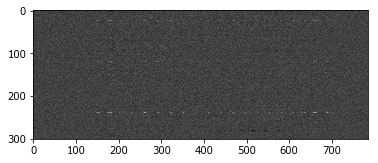

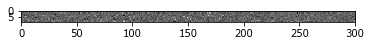

In [44]:
def show(img):
    fig,ax=plt.subplots()
    implot=plt.imshow(img)
    plt.gray()
    plt.show()
    
show(w12)
show(w23)

In [45]:
test_images,test_labels=load_mnist(test_images_path,test_labels_path)
#数据预处理
#inputs
test_inputs=np.zeros((test_images.shape[0],test_images.shape[1]+1))
test_inputs[:,0:1]=1#为数据添加bias 1
test_inputs[:,1:]=test_images[:,:] 

error_counts=0
for x,y in zip(test_inputs,test_labels):
    
    #计算输出值
    z2=w12.dot(x)
    a2=sigmoid(z2)
    
    z3=w23.dot(a2)
    a3=softmax(z3)
    
    if int(get_result(a3))!=int(y):
        error_counts+=1

error_counts/len(test_labels)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


0.1152